# Task 5 - To explore Business Analytics

#### 1. Importing the libraries for this task:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Importing the CSV and performing data pre-processing:

In [2]:
data=pd.read_csv('SampleSuperstore.csv')

In [3]:
#Checking first 5 columns:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#We drop the Postal Code column as it provides no contribution to data analysis
data = data.drop(columns = 'Postal Code', axis = 1)
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [5]:
#Check if there is any missing value in the dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#Check the datatype of each column in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [7]:
#Return a summary of statistics pertaining to the DataFrame columns
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


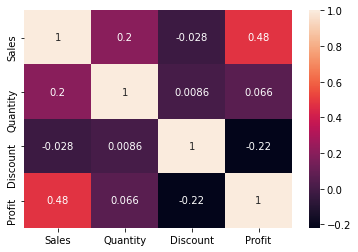

In [9]:
#Calculate heatmap to check association of each variable
sns.heatmap(data.corr(), annot= True)

#### 3. Data Visualization:

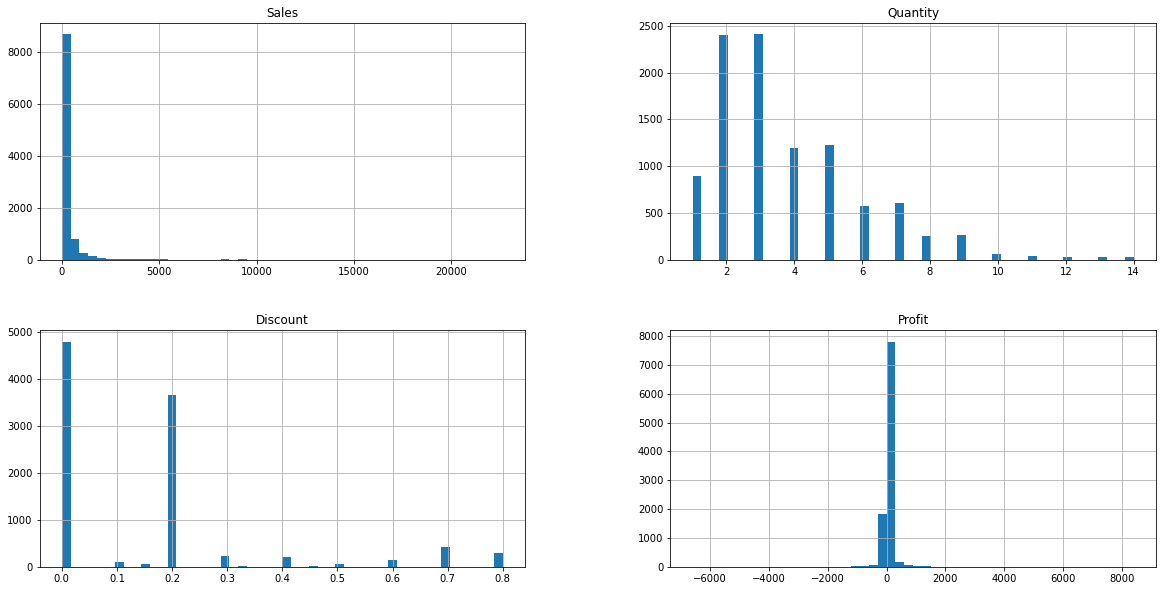

In [10]:
#Plot histogram
data.hist(bins=50, figsize=(20,10))
plt.show()

From the histogram graph we can say that our data is not normally distributed.

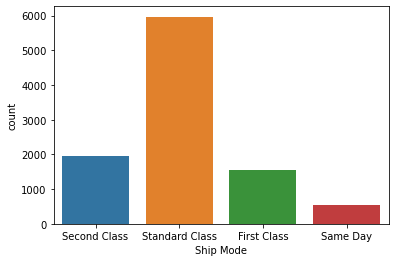

In [11]:
#Plot bar graph based on the category of ship mode
import seaborn as sns
sns.countplot(x=data['Ship Mode'])

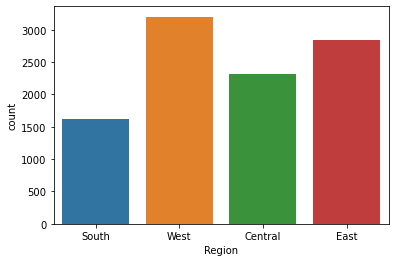

In [12]:
#Plot bar graph based on the category of region
sns.countplot(x=data['Region'])

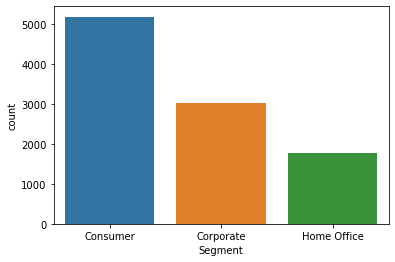

In [13]:
#Plot bar graph based on the category of segment
sns.countplot(x=data['Segment'])

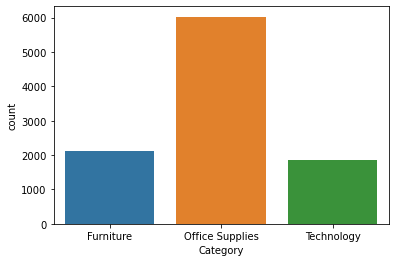

In [14]:
sns.countplot(x=data['Category'])

We create a barplot to check the profits gained and and losses incurred for each of the items:

Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

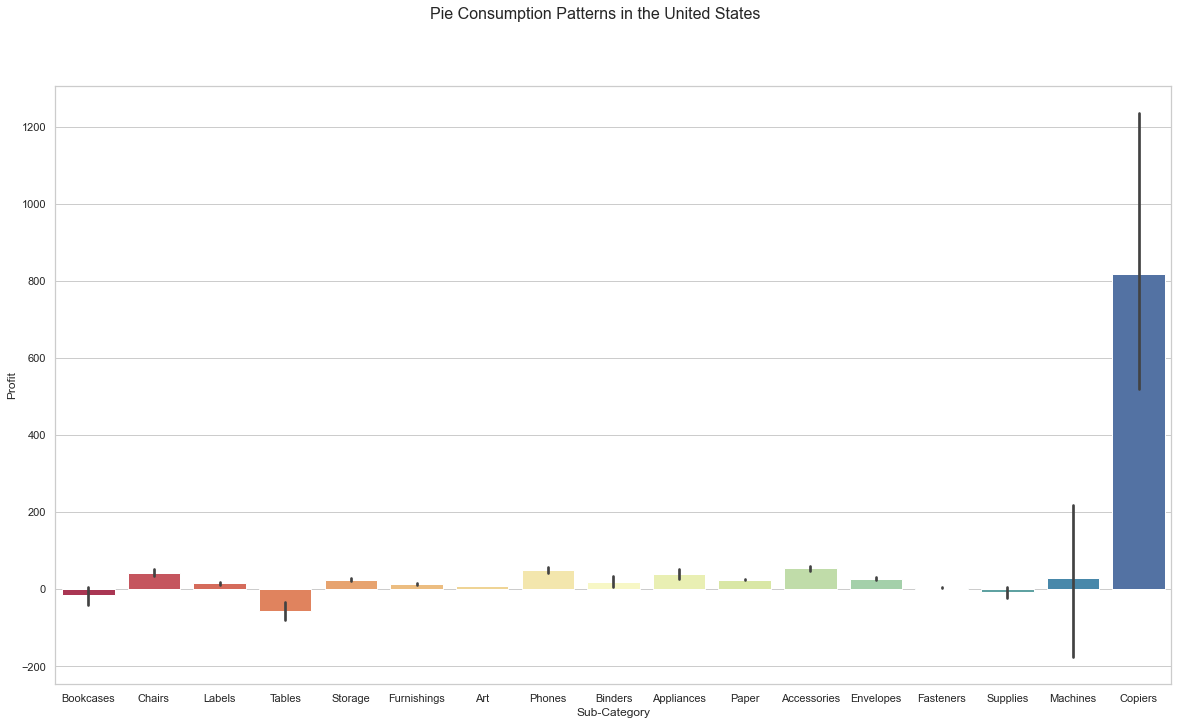

In [15]:
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,11))

sns.barplot(x='Sub-Category',y='Profit', data=data, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)

This barplot does not give an clear distribution of profit and losses althought it seems clear that Tables, bookcases and supplies are suffering from losses. We create a more concise view below:

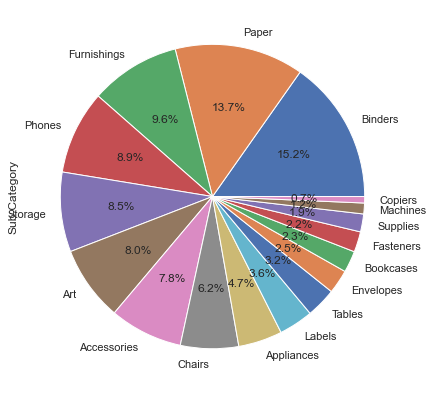

In [16]:
plt.figure(figsize=(10,7))
data['Sub-Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

We can observe from the pie chart that Binders, Paper, Phones etc are some of the most sold products, whereas Copiers, Machines, Supplies are the least sold. This along with the graph, we can conclude that we have to increase copier sales so as to maximise profit. We also have to figure out why Tables are not much sold and encounter a lot of loss.

We can check how are other states performing in terms of count of sales first:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

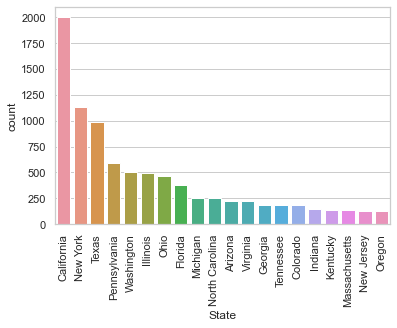

In [17]:
sns.countplot(x=data['State'], order=(data['State'].value_counts().head(20)).index)
plt.xticks(rotation=90)

Let us check the next 27 states

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

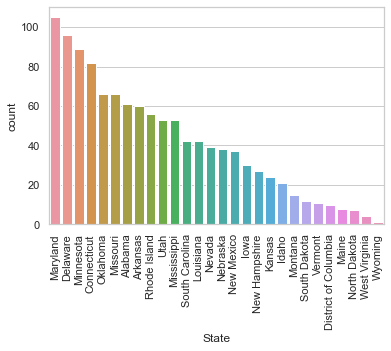

In [18]:
sns.countplot(x=data['State'], order=(data['State'].value_counts().tail(28)).index)
plt.xticks(rotation=90)

From the graph, we have to increase our sales in states like Wyoming, West Virginia and North Dakota.
Now let us compare this with the profits and losses with sales of all the states

<Figure size 2880x2880 with 0 Axes>

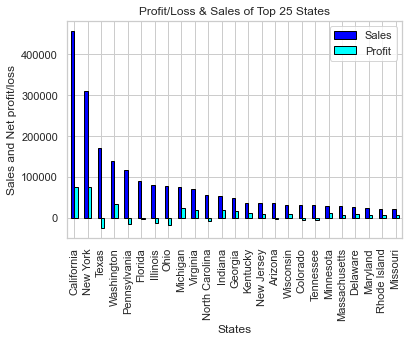

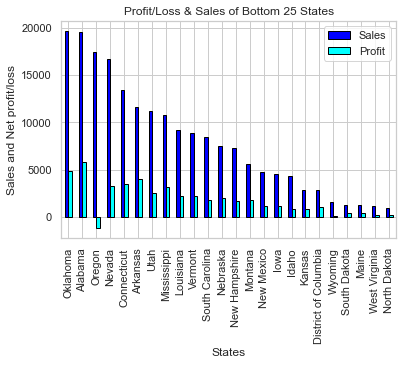

In [19]:
states = data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(40,40))
states[:25].plot(kind='bar', edgecolor = "#000000", color=['blue','cyan'])
plt.title("Profit/Loss & Sales of Top 25 States")
plt.xlabel('States')
plt.ylabel('Sales and Net profit/loss')
plt.grid(True)
states[25:].plot(kind='bar', edgecolor = "#000000", color=['blue','cyan'])
plt.title("Profit/Loss & Sales of Bottom 25 States")
plt.xlabel('States')
plt.ylabel('Sales and Net profit/loss')
plt.grid(True)

Texas is suffering from huge losses. Also, we can observe that we need to expand our market in Maine, West Virginia and North Dakota. Let us group by each category of items and find out the total profits and sales:

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


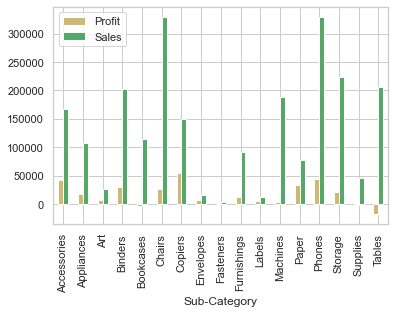

In [22]:
data.groupby('Sub-Category')['Profit','Sales'].sum().plot.bar(color = ['y','g'])

Tables is sold in good numbers, however the profits are shockingly lesser than we thought. Also, fasteners, envelopes, labels, and art are barely profitting or selling. However, Copiers, Machines, Supplies are sold the most than we thought earlier.

Now let us sort values and find the total profits across each state in the form of a dataframe with actual numbers:

In [24]:
pd.DataFrame(data.groupby('State').sum())['Profit'].sort_values(ascending=True)

State
Texas                  -25729.3563
Ohio                   -16971.3766
Pennsylvania           -15559.9603
Illinois               -12607.8870
North Carolina          -7490.9122
Colorado                -6527.8579
Tennessee               -5341.6936
Arizona                 -3427.9246
Florida                 -3399.3017
Oregon                  -1190.4705
Wyoming                   100.1960
West Virginia             185.9216
North Dakota              230.1497
South Dakota              394.8283
Maine                     454.4862
Idaho                     826.7231
Kansas                    836.4435
District of Columbia     1059.5893
New Mexico               1157.1161
Iowa                     1183.8119
New Hampshire            1706.5028
South Carolina           1769.0566
Montana                  1833.3285
Nebraska                 2037.0942
Louisiana                2196.1023
Vermont                  2244.9783
Utah                     2546.5335
Mississippi              3172.9762
Nevada        

In [26]:
pd.DataFrame(data.groupby('State').sum())['Discount'].sort_values(ascending=True)

State
Alabama                   0.00
Missouri                  0.00
Maine                     0.00
Louisiana                 0.00
Kentucky                  0.00
Kansas                    0.00
Iowa                      0.00
Indiana                   0.00
Wisconsin                 0.00
Mississippi               0.00
Nebraska                  0.00
North Dakota              0.00
District of Columbia      0.00
Oklahoma                  0.00
South Carolina            0.00
South Dakota              0.00
Vermont                   0.00
Arkansas                  0.00
Virginia                  0.00
Georgia                   0.00
Minnesota                 0.00
Wyoming                   0.20
West Virginia             0.30
New Hampshire             0.30
Maryland                  0.60
Connecticut               0.60
New Jersey                0.60
Delaware                  0.60
Montana                   1.00
Rhode Island              1.20
Idaho                     1.80
Michigan                  1.80
Ma

Notice how Texas, Pennsylvania and Ohio are the three states with most number of discounts but large amounts of losses. Let us plot this graphically.

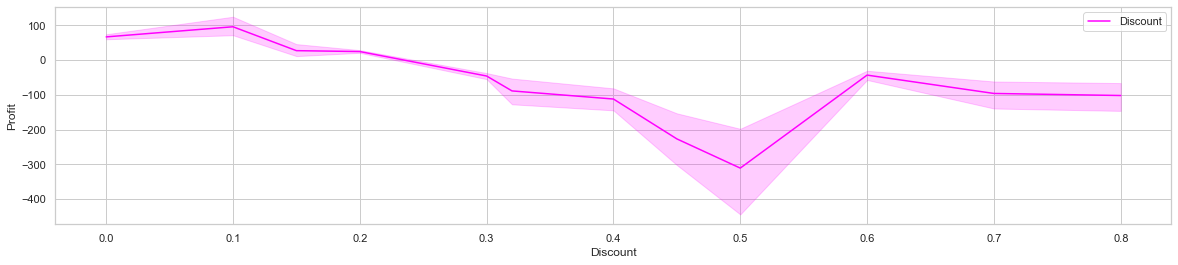

In [31]:
plt.figure(figsize = (20,4))
sns.lineplot('Discount', 'Profit', data = data, color = 'magenta', label= 'Discount')
plt.legend()

Thus, from the graph, we can conclude that profit reduces with increase in discount.

# Insights derived from the above EDA:

1) This company has shown to incur a huge loss during sales of bookcases and tables that appear as negative. This needs to be taken care of by improving the design, by checking the trends of bookcases and tables, or in case if the company has already maintained a database of user reviews from which we can realize the areas of improvement.

2) Company has gained profits in copier sales, however the number of sales is much lesser than we expect, and thus, there is an earnest need to increase these sales.

3) The company has faced losses in the top 25 states as compared to the least economic states.

4) When the profits of a state are compared with the discount provided in each state, the states which has allowed more discount, observed a huge loss.

5) Profit and discount show weak and negative relationship. This should be kept in mind that before taking any other decision related to business.

6) Office Supplies are have no issues. We have to work more on Technical and Furniture Category of business.